Published on December 11, 2025. By Prata, Marília (mpwolke)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Two lines Required to Plot Plotly
import plotly.io as pio
pio.renderers.default = 'iframe'

import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tiger-vs-lion-image-classification-dataset/lion_tiger_dataset/Lion/lion_169.jpg
/kaggle/input/tiger-vs-lion-image-classification-dataset/lion_tiger_dataset/Lion/lion_010.jpg
/kaggle/input/tiger-vs-lion-image-classification-dataset/lion_tiger_dataset/Lion/lion_056.jpg
/kaggle/input/tiger-vs-lion-image-classification-dataset/lion_tiger_dataset/Lion/lion_036.jpg
/kaggle/input/tiger-vs-lion-image-classification-dataset/lion_tiger_dataset/Lion/lion_077.jpg
/kaggle/input/tiger-vs-lion-image-classification-dataset/lion_tiger_dataset/Lion/lion_096.jpg
/kaggle/input/tiger-vs-lion-image-classification-dataset/lion_tiger_dataset/Lion/lion_082.jpg
/kaggle/input/tiger-vs-lion-image-classification-dataset/lion_tiger_dataset/Lion/lion_187.jpg
/kaggle/input/tiger-vs-lion-image-classification-dataset/lion_tiger_dataset/Lion/lion_069.jpg
/kaggle/input/tiger-vs-lion-image-classification-dataset/lion_tiger_dataset/Lion/lion_133.jpg
/kaggle/input/tiger-vs-lion-image-classification-dataset/lio

## Import Libraries

In [3]:
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

## Load data

In [4]:
#By Bisma Ali https://www.kaggle.com/code/bismahali/karachi-transport-dataset-eda-ida

import cv2

# Dataset Path
data_dir = "/kaggle/input/tiger-vs-lion-image-classification-dataset/lion_tiger_dataset" 

# Show folders/classes
classes = os.listdir(data_dir)
print("Dataset Classes:", classes)

Dataset Classes: ['Lion', 'tiger']


## Count Images Class

In [5]:
#By Bisma Ali https://www.kaggle.com/code/bismahali/karachi-transport-dataset-eda-ida

class_counts = {}

for cls in classes:
    cls_folder = os.path.join(data_dir, cls)
    images = [img for img in os.listdir(cls_folder) if img.lower().endswith(('.jpg','.png','.jpeg'))]
    class_counts[cls] = len(images)

print("\nImages Count per Class:")
for cls, cnt in class_counts.items():
    print(f"{cls} : {cnt}")

total_images = sum(class_counts.values())
print("\nTotal Images in Dataset:", total_images)


Images Count per Class:
Lion : 230
tiger : 230

Total Images in Dataset: 460


### Class Distribution (bar chart)

Above, already told us that the images ammount was the same.

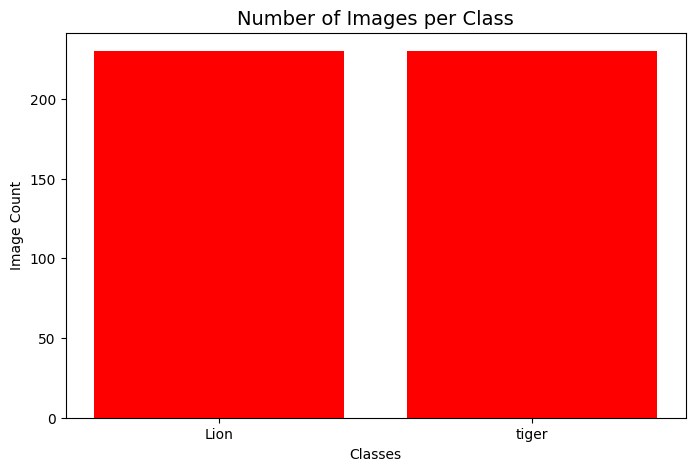

In [6]:
#By Bisma Ali https://www.kaggle.com/code/bismahali/karachi-transport-dataset-eda-ida

plt.figure(figsize=(8,5))
plt.bar(class_counts.keys(), class_counts.values(), color='r')
plt.title("Number of Images per Class", fontsize=14)
plt.xlabel("Classes")
plt.ylabel("Image Count")
plt.show()

## Sample images

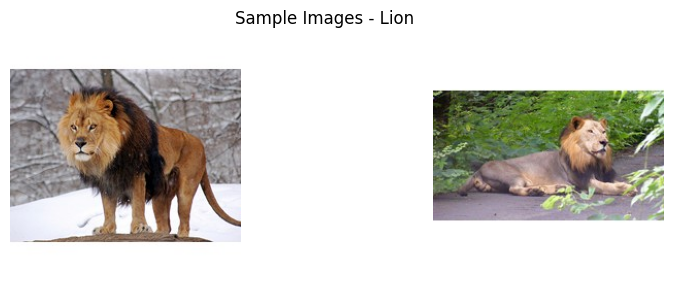

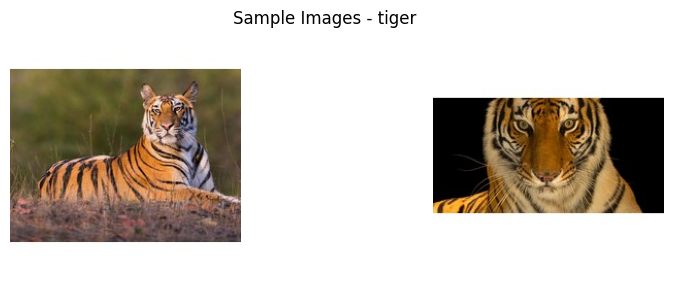

In [7]:
#By Bisma Ali https://www.kaggle.com/code/bismahali/karachi-transport-dataset-eda-ida

def show_samples(n=2):
    for cls in classes:
        folder = os.path.join(data_dir, cls)
        imgs = os.listdir(folder)[:n]

        plt.figure(figsize=(10,3))
        plt.suptitle(f"Sample Images - {cls}")

        for i, img_name in enumerate(imgs):
            img_path = os.path.join(folder, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.subplot(1, n, i+1)
            plt.imshow(img)
            plt.axis("off")

        plt.show()

show_samples(2) #We have 2 classes

In [8]:
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [9]:
#By Anthony Therrien https://www.kaggle.com/code/anthonytherrien/dog-vs-cat-trainer/notebook

# Define subdirectories
lyon_dir = os.path.join(data_dir, 'Lion')
tiger_dir = os.path.join(data_dir, 'tiger')


# Count images per class
num_lyon = len(os.listdir(lyon_dir))
num_tiger = len(os.listdir(tiger_dir))

print(f'Total Lyons: {num_lyon}, Total tigers: {num_tiger}')

Total Lyons: 230, Total tigers: 230


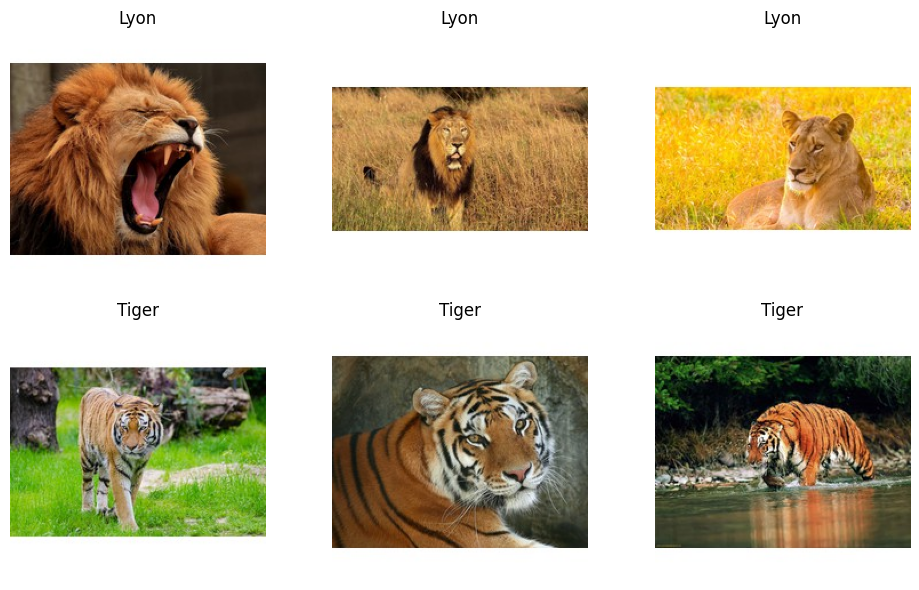

In [10]:
#By Anthony Therrien https://www.kaggle.com/code/anthonytherrien/dog-vs-cat-trainer/notebook

# Visualize sample images

from PIL import Image

sample_lyon = random.sample(os.listdir(lyon_dir), 3)
sample_tiger = random.sample(os.listdir(tiger_dir), 3)


fig, axes = plt.subplots(2, 3, figsize=(10,6)) #Original 4,3
for i, img_name in enumerate(sample_lyon):
    img_path = os.path.join(lyon_dir, img_name)
    axes[0, i].imshow(Image.open(img_path))
    axes[0, i].set_title('Lyon')
    axes[0, i].axis('off')
for i, img_name in enumerate(sample_tiger):
    img_path = os.path.join(tiger_dir, img_name)
    axes[1, i].imshow(Image.open(img_path))
    axes[1, i].set_title('Tiger')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

In [11]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

## We don't have train/test/valid

In [12]:
#By Anthony Therrien https://www.kaggle.com/code/anthonytherrien/dog-vs-cat-trainer/notebook

#Define parameters
img_size = (150, 150)
batch_size = 32

# Create data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.15,
    horizontal_flip=True
)

train_gen = train_datagen.flow_from_directory(
    data_dir,
    #target_size=(img_height, img_width),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary', #Original categorical multiclass We have 2 classes
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    #target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 368 images belonging to 2 classes.
Found 92 images belonging to 2 classes.


## Model — Convolutional Neural Network (CNN)

"We construct a CNN model with convolution, pooling, and dropout layers to prevent overfitting."

"In binary classification CNNs, a final Dense(1) layer with a sigmoid activation is used because it outputs a single probability (0 to 1) representing the likelihood of belonging to the positive class, making it efficient and interpretable for Yes/No decisions, whereas Dense(2) with softmax gives two probabilities that sum to 1, which is redundant and computationally less efficient for just two classes."

"Multi-Class Classification: For 3 or more classes (e.g., cat, dog, bird), you need Dense(3) with softmax, or Dense(2) with sigmoid if you treat it as binary (cat vs. not-cat). "

**CORRECT**

keras.layers.Dense(2, activation = 'softmax') 

keras.layers.Dense(1, activation = 'sigmoid')

**INCORRECT**

keras.layers.Dense(2, activation = 'sigmoid')

https://stackoverflow.com/questions/50808593/difference-between-dense2-and-dense1-as-the-final-layer-of-a-binary-classifi

In [13]:
#By Anthony Therrien https://www.kaggle.com/code/anthonytherrien/dog-vs-cat-trainer/notebook

# Build CNN model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) #Original Dense 1 sigmoid (2 classes)

#Original loss='categorical_crossentropy'  multiclass

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

2025-12-11 22:31:34.390561: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

## Epochs

No GPU.

In [14]:
#By Anthony Therrien https://www.kaggle.com/code/anthonytherrien/dog-vs-cat-trainer/notebook

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

# Train model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10, #Original 12
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.4647 - loss: 0.8953 - val_accuracy: 0.5000 - val_loss: 0.6981 - learning_rate: 0.0010
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 912ms/step - accuracy: 0.5324 - loss: 0.6847 - val_accuracy: 0.6413 - val_loss: 0.6689 - learning_rate: 0.0010
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 915ms/step - accuracy: 0.7655 - loss: 0.6476 - val_accuracy: 0.7174 - val_loss: 0.5498 - learning_rate: 0.0010
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 921ms/step - accuracy: 0.7217 - loss: 0.5600 - val_accuracy: 0.8152 - val_loss: 0.3903 - learning_rate: 0.0010
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7948 - loss: 0.4825 - val_accuracy: 0.7609 - val_loss: 0.4663 - learning_rate: 0.0010
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.7857 - loss: 0.4562 - val_accuracy: 0.9239 - val_loss: 0.3734 - learning_rate: 0.0010
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 902ms/step - accuracy: 0.7955 - loss: 0.4521 - va

## Model Evaluation

Visualize accuracy and loss curves, then compute classification metrics.

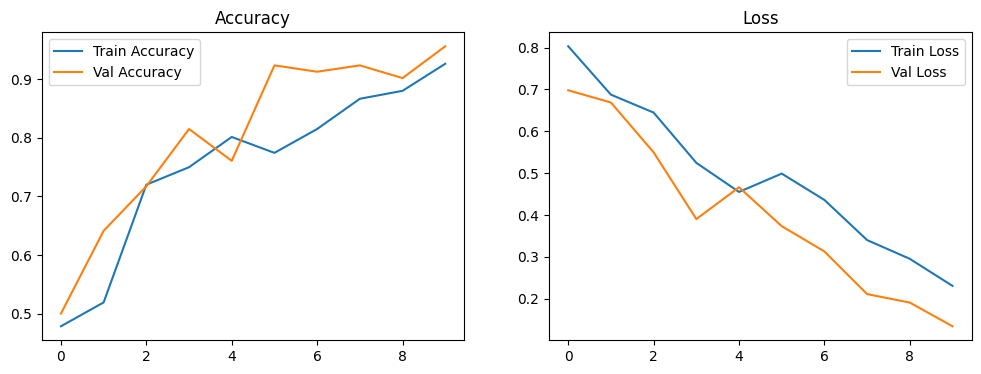

In [15]:
#By Anthony Therrien https://www.kaggle.com/code/anthonytherrien/dog-vs-cat-trainer/notebook

# Plot accuracy and loss
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend(); plt.title('Accuracy');

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss');
plt.show()

## Evaluate on validation 

In [17]:
#By Sonal Shinde https://www.kaggle.com/code/sonalshinde123/tiger-vs-lion-image-classifier-cnn/notebook

import math

# Evaluate on validation set
val_steps = math.ceil(val_gen.samples / val_gen.batch_size)
val_gen.reset()

y_prob = model.predict(val_gen, steps=val_steps, verbose=1)
y_pred_classes = (y_prob > 0.5).astype(int).reshape(-1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 385ms/step


In [18]:
#By Sonal Shinde https://www.kaggle.com/code/sonalshinde123/tiger-vs-lion-image-classifier-cnn/notebook

# Align lengths
y_true = val_gen.classes
y_pred = y_pred_classes[:len(y_true)]

## Confusion Matrix

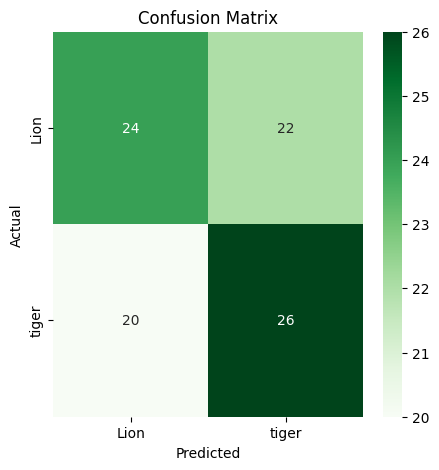

In [19]:
#By Sonal Shinde https://www.kaggle.com/code/sonalshinde123/tiger-vs-lion-image-classifier-cnn/notebook

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=list(train_gen.class_indices.keys()),
            yticklabels=list(train_gen.class_indices.keys()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [20]:
#By Sonal Shinde https://www.kaggle.com/code/sonalshinde123/tiger-vs-lion-image-classifier-cnn/notebook

# Classification report
print(classification_report(y_true, y_pred, target_names=list(train_gen.class_indices.keys())))

              precision    recall  f1-score   support

        Lion       0.55      0.52      0.53        46
       tiger       0.54      0.57      0.55        46

    accuracy                           0.54        92
   macro avg       0.54      0.54      0.54        92
weighted avg       0.54      0.54      0.54        92



## Evaluate the Model

In [21]:
# Make predictions on the test set
# Correctly predict on the entire test set
predictions = model.predict(val_gen, steps=int(np.ceil(val_gen.samples / batch_size)))
predicted_classes = (predictions > 0.5).astype("int32")  # Convert probabilities to binary classes

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 370ms/step


In [22]:
true_classes = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

## Create a Pandas Dataframe for results

In [24]:
# Create a pandas DataFrame for results
results_df = pd.DataFrame({
    'Filename': val_gen.filenames,
    'True Class': [class_labels[i] for i in val_gen.classes],
    'Predicted Probability': predictions.flatten()[:len(true_classes)],  # Truncate here as well
    'Predicted Class': [class_labels[i] for i in predicted_classes.flatten()]
})

print("\nResults DataFrame:")
print(results_df.head())


Results DataFrame:
            Filename True Class  Predicted Probability Predicted Class
0  Lion/lion_001.jpg       Lion               0.679440            Lion
1  Lion/lion_002.jpg       Lion               0.630554            Lion
2  Lion/lion_003.jpg       Lion               0.962254            Lion
3  Lion/lion_004.jpg       Lion               0.045347            Lion
4  Lion/lion_005.jpg       Lion               0.059830            Lion


In [29]:
def visualize_predictions(generator, model, num_images=5):
    """Visualizes predictions on a few sample images from the generator."""
    image_files = generator.filenames
    sample_indices = random.sample(range(len(image_files)), min(num_images, len(image_files)))
    plt.figure(figsize=(12, 6))

    for i, idx in enumerate(sample_indices):
        image_path = os.path.join(generator.directory, image_files[idx])
        img = Image.open(image_path).resize((img_size))#Original img_height, img_width
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = img_array / 255.0  # Rescale
        img_array = np.expand_dims(img_array, axis=0)  # Create batch

        prediction = model.predict(img_array)[0][0]
        predicted_class = "tiger" if prediction > 0.5 else "Lion"
        true_class = image_files[idx].split('/')[0] # Extract class from filename

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        title = f"True: {true_class}\nPredicted: {predicted_class} ({prediction:.2f})"
        plt.title(title)
        plt.axis('off')

    plt.tight_layout()
    plt.suptitle("Sample Predictions", y=1.05)
    plt.show()

## Changing predicted class to tiger Else Lion (all correct)

However, **Lion ELSE tiger** (all predictions were **wrong**. Why?)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


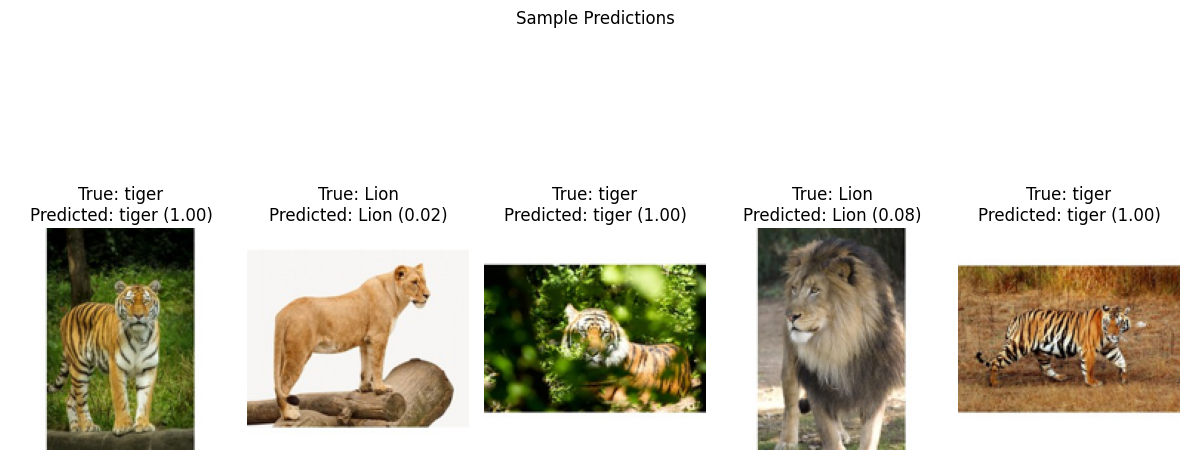

In [30]:
visualize_predictions(val_gen, model)

## The model could differentiate between Lion and tiger on the images.

### Dear Tiger, what do you think about this Model? 

### A picture is worth a thousand roars.

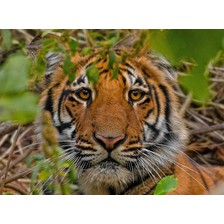

In [31]:
Image.open(data_dir + '/tiger/tiger_036.jpg')

#Acknowledgements:

Sonal Shinde https://www.kaggle.com/code/sonalshinde123/tiger-vs-lion-image-classifier-cnn/notebook

Bisma Ali https://www.kaggle.com/code/bismahali/karachi-transport-dataset-eda-ida

Anthony Therrien https://www.kaggle.com/code/anthonytherrien/dog-vs-cat-trainer/notebook

Marília Prata https://www.kaggle.com/code/mpwolke/parrots-multiclass-cnn/notebook